In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Question 1

In [3]:
def f(theta, p, s):
    z = np.cos(theta) + np.sin(theta)*1j
    num = 3 - 2*p -np.sqrt((3 - 2*p)**2 - 12*z**2*p*(1 - p))
    h = num*p/(6*(1-p)) + (num**3)/(6**3 *(z*(1-p))**2 )
    return h/(z**s)

n = 1000
xs = [2*np.pi*i/n for i in range(n)]
p_vals = [0.6, 0.9]
all_integrals = []
for p in p_vals:
    integrals = []
    for s in range(100):
        ys = [f(x, p, s)/(2*np.pi) for x in xs]
        integrals.append(np.real(np.trapz(ys, xs)))
    all_integrals.append(integrals)

## Without giant component (p = 0.9)

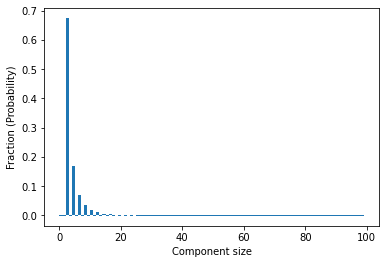

In [71]:
plt.hist(np.arange(100), bins=np.arange(100), weights=all_integrals[1], density=False, rwidth=1, label='Theoretical')
plt.xlabel('Component size')
plt.ylabel('Fraction (Probability)')
plt.show()

## With giant component (p = 0.6)


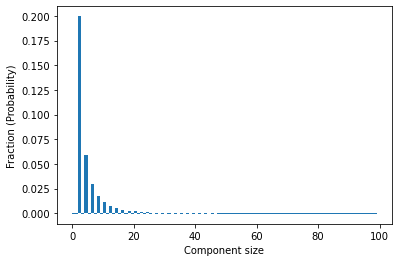

In [72]:
plt.hist(np.arange(100), bins=np.arange(100), weights=all_integrals[0], density=False, rwidth=1, label='Theoretical')
plt.xlabel('Component size')
plt.ylabel('Fraction (Probability)')
plt.show()

In [66]:
theoretical_fraction_in_giant_component = 1 - sum(all_integrals[0]) 
print(theoretical_fraction_in_giant_component)

0.6840438068549621


In [ ]:
sum(all_integrals[1])

Around 68.4% nodes in the giant component theoretically (estimated from first 100 components)

In [112]:
# def f_cum(theta, p):
#     z = (np.cos(theta) + np.sin(theta)*1j)
#     num = 3 - 2*p -np.sqrt((3 - 2*p)**2 - 12*z**2*p*(1 - p))
#     h = num*p/(6*(1-p)) + (num**3)/(6**3 *(z*(1-p))**2 )
#     return h/(z-1)

# def f(theta, p, s):
#     z = np.cos(theta) + np.sin(theta)*1j
#     num = 3 - 2*p -np.sqrt((3 - 2*p)**2 - 12*z**2*p*(1 - p))
#     h = num*p/(6*(1-p)) + (num**3)/(6**3 *(z*(1-p))**2 )
#     return h/(z**s)
# # def fmod(theta, p, s):
# #     z = 2*(np.cos(theta) + np.sin(theta)*1j)
# #     num = 3 - 2*p -np.sqrt((3 - 2*p)**2 - 12*z**2*p*(1 - p))
# #     h = num*p/(6*(1-p)) + (num**3)/(6**3 *(z*(1-p))**2 )
# #     return h/(z**s)
# n = 100000
# xs = [2*np.pi*i/n for i in range(1,n)]
# ys = [f_cum(x, 0.6)/(2*np.pi) for x in xs]
# print(2*np.trapz(ys, xs))

(0.34993900000666384-1.8478552021861105e-12j)


# Question 2

In [44]:
def generate_rand_graph(n, p):
    degrees = np.random.uniform(size=(n,))
    degrees[degrees > p] = 3
    degrees[degrees <= p] = 1
    edges = [list() for _ in range(n)]
    nodes = np.arange(n)
    num_edges = sum(degrees)/2
    while num_edges > 0:
        edge = np.random.choice(nodes, replace=False, p=degrees/(2*num_edges), size=2)
        if edge[0] in edges[edge[1]] or edge[1] in edges[edge[0]]:
            continue
        edges[edge[0]].append(edge[1])
        edges[edge[1]].append(edge[0])
        degrees[edge[0]] -= 1
        degrees[edge[1]] -= 1
        assert degrees[edge[0]] >= 0
        num_edges -= 1
    return edges

def dfs(graph, i):
    nodes = [i]
    done = set([i])
    while nodes:
        next_nodes = [n for n in graph[nodes.pop()] if n not in done]
        nodes.extend(next_nodes)
        done = done.union(next_nodes)
    return list(done)

def get_connected_comps(graph):
    all_nodes = set(range(len(graph)))
    comp_sizes = []
    while all_nodes:
        comp = dfs(graph, all_nodes.pop())
        all_nodes = all_nodes.difference(comp)
        comp_sizes.append(len(comp))
    return comp_sizes

In [54]:
N = 10000

large_graph = generate_rand_graph(N, 0.6)
small_graph = generate_rand_graph(N, 0.9)

large_sizes = get_connected_comps(large_graph)
small_sizes = get_connected_comps(small_graph)

## Without giant component (p = 0.9)

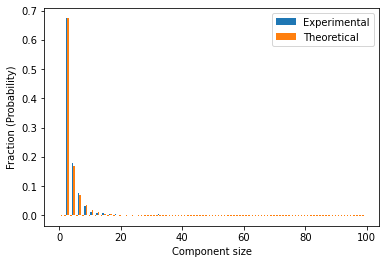

In [73]:
plt.hist([small_sizes, np.arange(100)], bins=np.arange(100), weights=[np.array(small_sizes)/N, all_integrals[1]], density=False, rwidth=1, label=['Experimental', 'Theoretical'])
plt.xlabel('Component size')
plt.ylabel('Fraction (Probability)')
plt.legend()
plt.show()

## With giant component (p = 0.6)

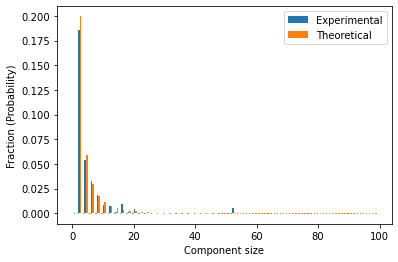

In [74]:
plt.hist([large_sizes, np.arange(100)], bins=np.arange(100), weights=[np.array(large_sizes)/N, all_integrals[0]], density=False, rwidth=1, label=['Experimental', 'Theoretical'])
plt.xlabel('Component size')
plt.ylabel('Fraction (Probability)')
plt.legend()
plt.show()

In [68]:
experimental_fraction_in_giant_component = large_sizes[0]/sum(large_sizes)
print(experimental_fraction_in_giant_component)

0.6718


Around 67.2% nodes in the giant component experimentally